** TITANIC SURVIVAL PREDICTION**

TASK:- Use the Titanic dataset to build a model that predicts whether a
 passenger on the Titanic survived or not.




In [107]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Titanic-Dataset.csv')

#Explore the dataframe

Extract the head of the dataset.

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Extract the tail of the dataset.

In [109]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Information about the dataset.To get a concise summary of the DATASET.**

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Generate summary statistics for numerical columns in a DataFrame.

In [111]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Count the non-null (non-missing) values in each column of the DataFrame.

In [112]:
df.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


Shape of the DataFrame

In [113]:
df.shape

(891, 12)

#Visualization the data for better understanding.

<ipython-input-114-be27a31c3fb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="coolwarm")


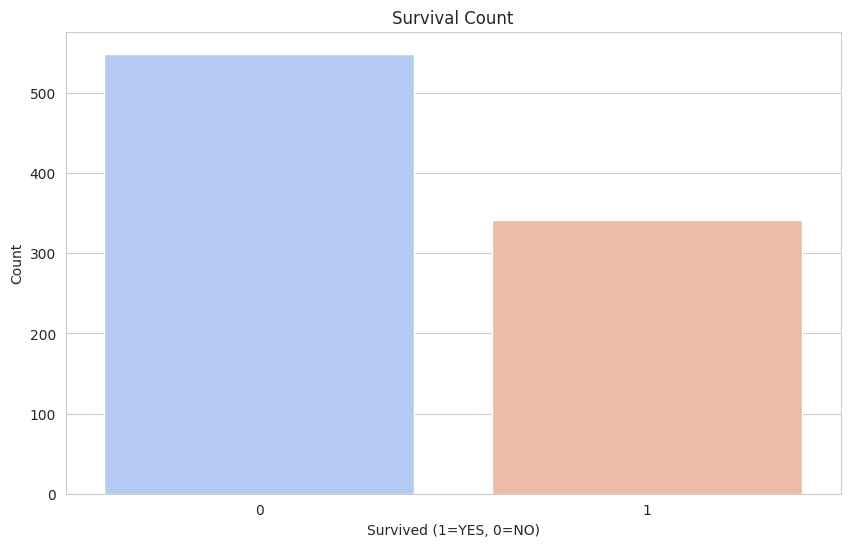

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 1st Countplot for Survival Distribution.
plt.figure(figsize=(10,6))
sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Survival Count")
plt.xlabel("Survived (1=YES, 0=NO)")
plt.ylabel("Count")
plt.show()

<ipython-input-115-add2b094ee48>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="coolwarm")


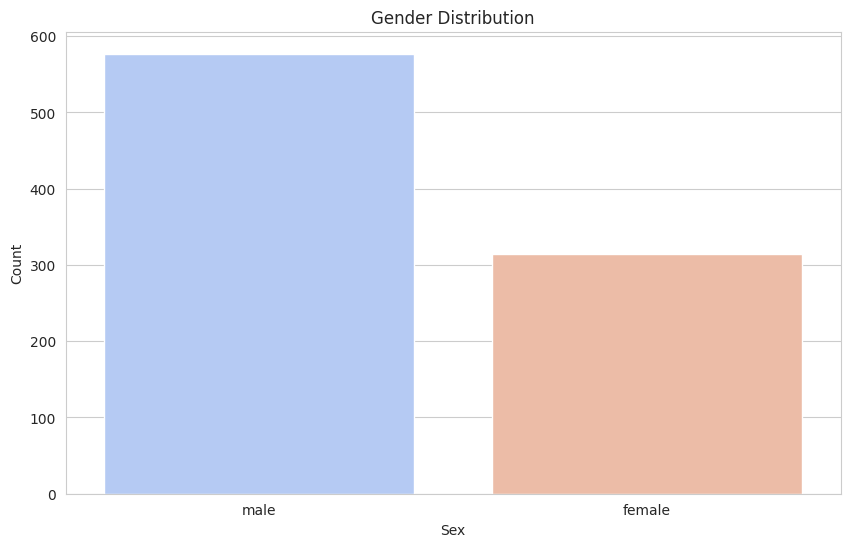

In [115]:
#2nd count plot for gender distribution

plt.figure(figsize=(10,6))
sns.countplot(x="Sex", data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()



<ipython-input-116-fedea981c1c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived",legend=False, data=df, palette="coolwarm")


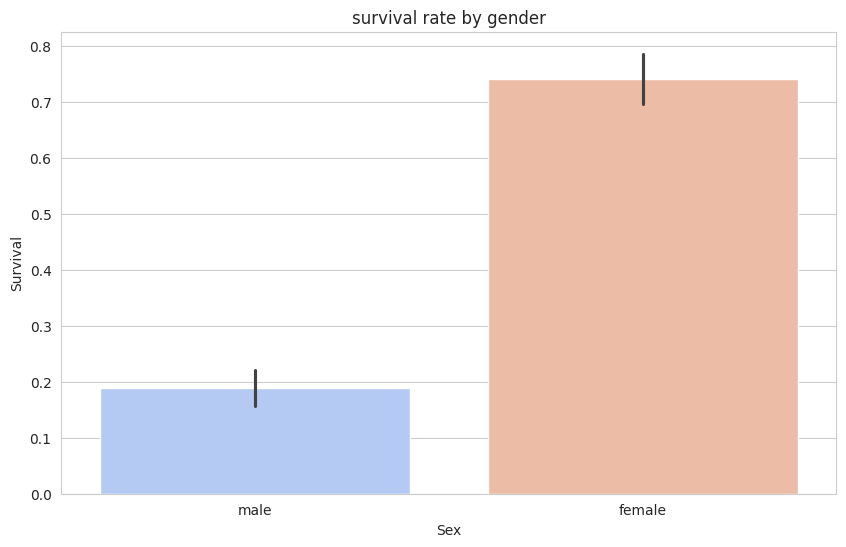

In [116]:
#3rd survival rate by gender

plt.figure(figsize=(10,6))
sns.barplot(x="Sex", y="Survived",legend=False, data=df, palette="coolwarm")
plt.title("survival rate by gender")
plt.xlabel("Sex")
plt.ylabel("Survival")
plt.show()

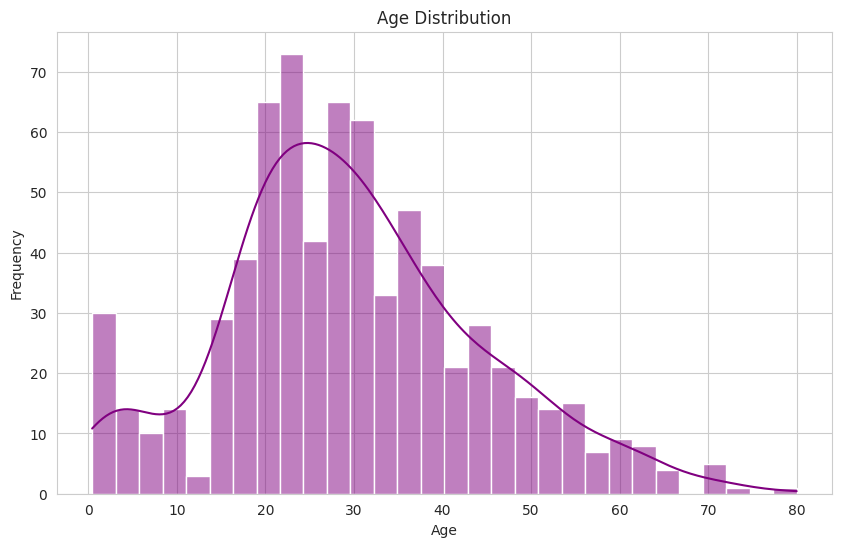

In [117]:
#4th histplot of Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="purple")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

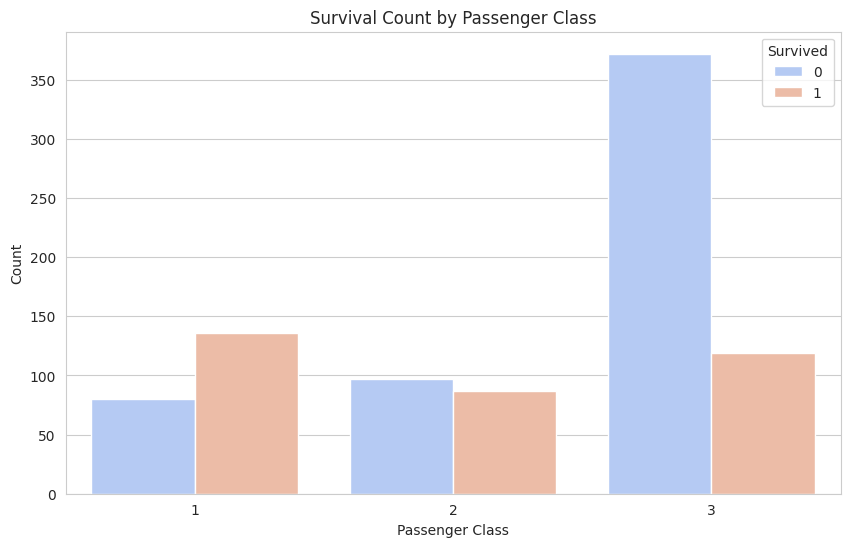

In [118]:
#5th survival rate by passenger class
plt.figure(figsize=(10,6))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

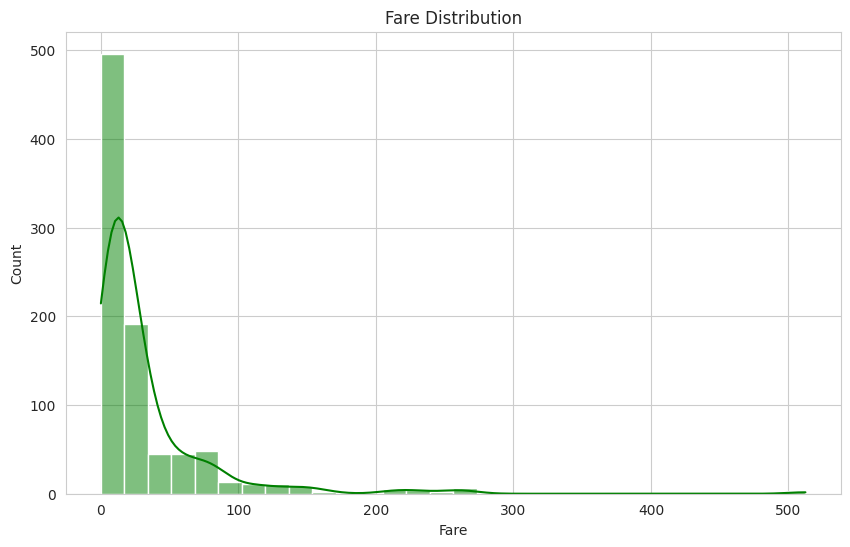

In [119]:
#6th Fare Distribution
plt.figure(figsize=(10,6))
sns.histplot(df["Fare"], bins=30,kde=True, color="Green")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

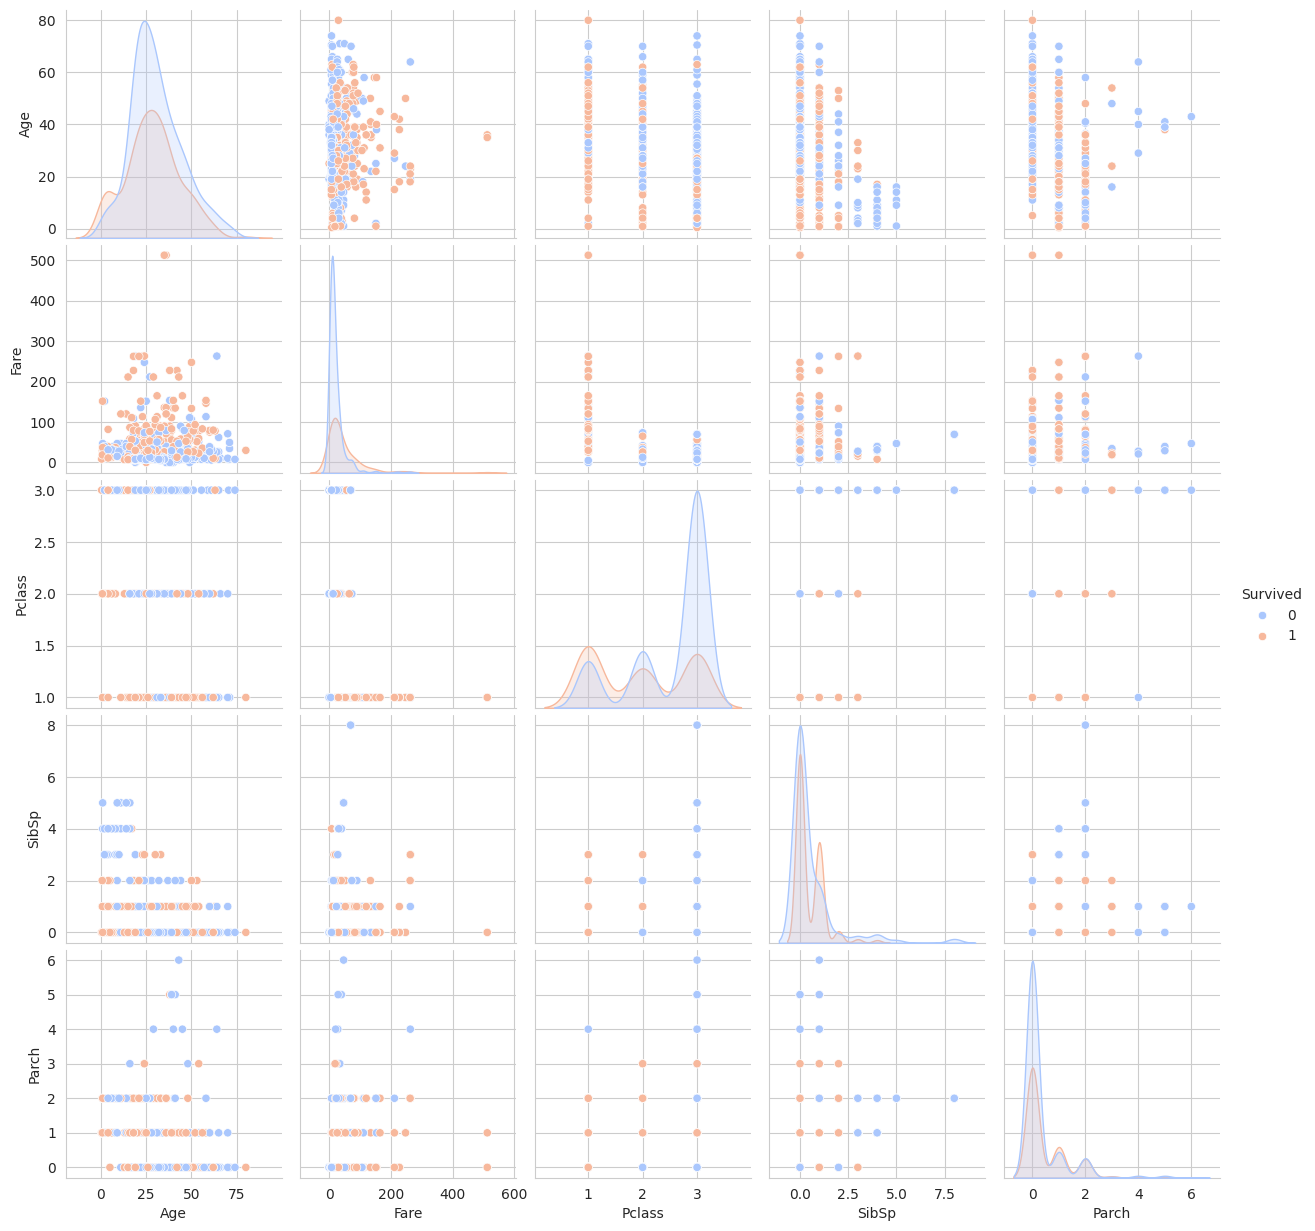

In [120]:
#7th pairplot for numerical features
sns.pairplot(df[["Survived", "Age", "Fare", "Pclass", "SibSp", "Parch"]],hue="Survived",palette="coolwarm")
plt.show()

# Deals with Missing values

In [121]:
#checking missing values

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Handle missing values**

**The cabin column has so many missing values(687 out of 891). since most are missing, so we drop this column.**

In [122]:
df.drop(columns=["Cabin"], inplace=True)


**Fill Missing Values for Age column. because it has 177 missing values. so we can fill them with median.**

In [123]:
df.fillna({"Age": df["Age"].median()}, inplace=True)

**Fill Missing Values for Embarked**
**The Embarked column has only 2 missing values. Since Embarked is categorical, we replace missing values with the most frequent (mode) value**

In [124]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


In [125]:
df.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


# Verify Missing Values Are Handled or Not

In [126]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Encoding Categorical Variables.

#1st: Sex has only two unique values [male, female], we use Label Encoding [male → 0, female → 1]


In [127]:
df["Sex"]= df['Sex'].map({"male":0, "female":1})

# 2nd: One-Hot Encoding (For Multi-Class Categories)

**For Embarked (C, Q, S), we use One-Hot Encoding to create separate columns**

Here we dropping one category(Embarked C) to avoid multicollinearity(dummy variable trap).

In [128]:
df = pd.get_dummies(df, columns=["Embarked"],drop_first=True)

**Check the updated DataFrame**

In [129]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [130]:
#encode the Embarked colums True False to 1 and 0
df[['Embarked_Q' ,'Embarked_S']]=df[['Embarked_Q' , 'Embarked_S']].astype(int)

#Identify Numerical Columns for Scaling

**Some numerical columns have very different ranges:**

Age: Typically between (0–80),  
Fare: Can be as high as : 500+ ,  
Pclass, SibSp, Parch: Small integer values - (1, 2, 3, etc.)
To ensure all features contribute equally to the model, i have to scale them.

# Choose a Scaling Method

**We have two common methods:**

1st Standardization (StandardScaler) *Centers data around 0 with a standard deviation of 1. , *Good for normally distributed data.

2nd Normalization (MinMaxScaler) *Scales values between 0 and 1 , *Good for non-Gaussian or skewed data.

**Since Fare and Age columns are maybe skewed, MinMaxScaler is a better choice for this project.**

#Apply Scaling Method

In [131]:
from sklearn.preprocessing import MinMaxScaler

##select numerical columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

#initialize scaler
scaler= MinMaxScaler()

#fit and transform the selected columns
df[num_cols]= scaler.fit_transform(df[num_cols])

#result
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0  0.271174  0.125   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.472229  0.125   
2                             Heikkinen, Miss. Laina    1  0.321438  0.000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.434531  0.125   
4                           Allen, Mr. William Henry    0  0.434531  0.000   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0    0.0         A/5 21171  0.014151           0           1  
1    0.0          PC 17599  0.139136           0           0  
2    0.0  STON/O2. 3101282  0.015469           0           1  
3    0.0            113803  0.103644           0           1  

#Define feature and target variables

**Features (X): Independent variables, columns=["Survived", "PassengerId", "Name", "Ticket"]

Target (y): Survived column (0 = died, 1 = survived)



In [132]:
## Define target variable
y = df['Survived'].copy()
print(type(y))
print(y.shape)

## Define features (drop target and irrelevant columns)
x = df.drop(columns=['Survived', 'PassengerId','Name','Ticket']) ## Drop non-useful columns


<class 'pandas.core.series.Series'>
(891,)


#Verify the changes

In [133]:
print(x.head())#view first row
print(x.columns)# view remaining columns names

   Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S
0       3    0  0.271174  0.125    0.0  0.014151           0           1
1       1    1  0.472229  0.125    0.0  0.139136           0           0
2       3    1  0.321438  0.000    0.0  0.015469           0           1
3       1    1  0.434531  0.125    0.0  0.103644           0           1
4       3    0  0.434531  0.000    0.0  0.015713           0           1
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


#Train-Test Split

**Now X (features) and y (target) are ready, split them into training (80%) and testing (20%) datasets**

In [134]:
#check that both x and y is a pandas dataframe or  a list object.
#if it is a pandas dataframe it will properly execute but if it is a list object it will not execute and we have to convert it in pandas dataframe
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [135]:
#check the shape of the dataframe is both x and y is same or not.
#if it is same it will execute properly otherwise not execute.
print(x.shape)
print(y.shape)

(891, 8)
(891,)


In [137]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify = y)

print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Train data shape: (712, 8)
Test data shape: (179, 8)


In [138]:
print(x_train.isnull().sum())  # Check missing values in training set
print(x_test.isnull().sum())   # Check missing values in test set


Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


# Choose and Train a Machine Learning Model

**LOGISTIC REGRESSION**

When we want to predict a output that will answered in yes(1) or No(0) , that time logistic regression is a perfect model for simple baseline.

#Import and Train Logistic Regression


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


#make prediction on the test set
y_pred = model.predict(x_test)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[97 13]
 [23 46]]


# Conclusion

**This project aimed to predict the survival of passengers aboard the Titanic using machine learning. By exploring the dataset, handling missing values, encoding categorical variables, and scaling numerical features, a Logistic Regression model was trained and evaluated. The model achieved an accuracy of approximately 80%, demonstrating its ability to make reasonable predictions based on passenger characteristics.**

**The analysis revealed key factors influencing survival, such as gender (females had a higher survival rate), passenger class (higher classes had better chances), and age (younger passengers were more likely to survive). These insights align with historical accounts of the disaster.**

**Overall, this project demonstrates the power of data science and machine learning in extracting meaningful insights from historical events and making predictions. The developed model can serve as a foundation for further research and analysis related to the Titanic disaster.**

In [144]:
%%writefile README.md

# Titanic Survival Prediction

This project aims to predict the survival of passengers aboard the Titanic using machine learning. By exploring the dataset, handling missing values, encoding categorical variables, and scaling numerical features, a Logistic Regression model was trained and evaluated. The model achieved an accuracy of approximately 80%, demonstrating its ability to make reasonable predictions based on passenger characteristics.

## Project Overview

The Titanic dataset contains information about passengers who were on board the Titanic, including their demographics, ticket details, and survival status. The goal of this project is to build a model that can accurately predict whether a passenger survived or not based on their features.

## Steps Involved

1. **Data Exploration and Cleaning:**
   - Explored the dataset to understand its structure and characteristics.
   - Handled missing values by imputing or removing them.
   - Encoded categorical variables into numerical representations.
   - Scaled numerical features to ensure they contribute equally to the model.

2. **Model Selection and Training:**
   - Chose Logistic Regression as the machine learning model for this classification task.
   - Trained the model on a portion of the dataset (training set).

3. **Model Evaluation:**
   - Evaluated the model's performance on a separate portion of the dataset (testing set).
   - Used metrics like accuracy, precision, recall, and F1-score to assess the model's effectiveness.

## Results

The Logistic Regression model achieved an accuracy of approximately 80% in predicting passenger survival. This indicates that the model is able to make reasonable predictions based on the given features.

## Insights

The analysis revealed key factors influencing survival, such as:

- **Gender:** Females had a higher survival rate.
- **Passenger Class:** Higher classes had better chances of survival.
- **Age:** Younger passengers were more likely to survive.

These insights align with historical accounts of the disaster.

## Conclusion

This project demonstrates the power of data science and machine learning in extracting meaningful insights from historical events and making predictions. The developed model can serve as a foundation for further research and analysis related to the Titanic disaster.


## Usage

To run this project, you will need the following:

- Python 3.x
- Jupyter Notebook
- Pandas
- NumPy
- Scikit-learn
- Matplotlib
- Seaborn

You can install these packages using pip:

Once you have installed the necessary packages, you can open the  Google colab or Jupyter Notebook file and run the code cells.


Writing README.md
